# Harry Potter Housing with Logistical Regression

In [ ]:
import csv
import numpy as np
with open("resources/dataset_train.csv",'r') as dest_f:
    data_iter = csv.reader(dest_f,
                           delimiter = ",",
                           quotechar = '"')
    next(data_iter)
    data = [data for data in data_iter]
data_train = np.asarray(data, dtype = None)


with open("resources/dataset_test.csv",'r') as dest_f:
    data_iter = csv.reader(dest_f,
                           delimiter = ",",
                           quotechar = '"')
    next(data_iter)
    data = [data for data in data_iter]
data_test = np.asarray(data, dtype = None)

# Data Analysis V1

In [ ]:
def describe_function(data):
    import numpy as np
    import math

    np.warnings.filterwarnings('ignore')
    
    def describe_count(data,column):
        count = 0
        for row in data[:,column]:
            if math.isnan(row):
                continue
            else:
                count += 1
        return(count)

    def describe_mean(data,column):
        count = 0
        total_sum = 0
        for row in data[:,column]:
            if math.isnan(row):
                continue
            else:
                count += 1
                total_sum += row
        mean = total_sum/count
        return(mean)

    def describe_max(data,column):
        max_saved = data[0,column]
        for row in data[:,column]:
            if math.isnan(row):
                continue
            else:
                if row >= max_saved:
                    max_saved = row
                else:
                    continue
        return(max_saved)

    def describe_min(data,column):
        min_saved = data[0,column]
        for row in data[:,column]:
            if math.isnan(row):
                continue
            else:
                if row <= min_saved:
                    min_saved = row
                else:
                    continue
        return(min_saved)


    # assume whole population
    def describe_std(data,column):
        sample_mean = float(describe_mean(data,column))
        total_variance=float(0)
        count=float(0)
        for row in data[:,column]:
            if math.isnan(row):
                continue
            else:
                count += 1
                total_variance+= math.pow((row-sample_mean),2)
        std = math.sqrt(total_variance/(count))
        return(std)

    def describe_perc25(data,column):
        sort = sorted(data[:,0])
        length = len(data[:,0])
        pick = int((25/100)*length)
        percentage = sort[pick]
        return(percentage)

    def describe_perc50(data,column):
        sort = sorted(data[:,0])
        length = len(data[:,0])
        pick = int((50/100)*length)
        percentage = sort[pick]
        return(percentage)

    def describe_perc75(data,column):
        sort = sorted(data[:,0])
        length = len(data[:,0])
        pick = int((75/100)*length)
        percentage = sort[pick]
        return(percentage)
    
    mean = np.zeros(data.shape[1])
    for i in range(0,data.shape[1]):
        try:
            mean[i] = describe_mean(data,i)
        except ZeroDivisionError: 
            mean[i] = 0

    count = np.zeros(data.shape[1])
    for i in range(0,data.shape[1]):
        try:
            count[i] = describe_count(data,i)
        except ZeroDivisionError: 
            count[i] = 0

    std = np.zeros(data.shape[1])
    for i in range(0,data.shape[1]):
        try:
            std[i] = describe_std(data,i)
        except ZeroDivisionError: 
            std[i] = 0

    minimum = np.zeros(data.shape[1])
    for i in range(0,data.shape[1]):
        try:
            minimum[i] = describe_min(data,i)
        except ZeroDivisionError: 
            minnimum[i] = 0

    maximum = np.zeros(data.shape[1])
    for i in range(0,data.shape[1]):
        try:
            maximum[i] = describe_max(data,i)
        except ZeroDivisionError: 
            maximum[i] = 0

    perc_25 = np.zeros(data.shape[1])
    for i in range(0,data.shape[1]):
        try:
            perc_25[i] = describe_perc25(data,i)
        except ZeroDivisionError: 
            perc_25[i] = 0

    perc_50 = np.zeros(data.shape[1])
    for i in range(0,data.shape[1]):
        try:
            perc_50[i] = describe_perc50(data,i)
        except ZeroDivisionError: 
            perc_50[i] = 0

    perc_75 = np.zeros(data.shape[1])
    for i in range(0,data.shape[1]):
        try:
            perc_75[i] = describe_perc75(data,i)
        except ZeroDivisionError: 
            perc_75[i] = 0
    
    info = np.concatenate(([mean], [count], [std],[minimum],[maximum],[perc_25],[perc_50],[perc_75]), axis=0)
    info = np.round_(info, decimals=2)

    features= list()
    for i in range(1,len(data[1])+1):
        features.append('Feature'+str(i))

    counter = len(data[0])
    numberofprints = 0

    while counter >0:
        if counter >4:
            numberofprints += 4
            print('\t''%10s ' %(features[numberofprints-4:numberofprints]))
            row_labels= ['MEAN', "COUNT" ,"STD" ,"MIN" ,"MAXIMUM" ,"PERC_25" ,"PERC_50", "PERC_75"]
            for row_label, row in zip(row_labels[0:8], info[:,numberofprints-4:numberofprints]):
                print('%07s [%s]' % (row_label, ' '.join('%10s' % i for i in row)))
            counter += -4
        else:
            numberofprints +=counter
            print('\t''%10s ' %(features[numberofprints-counter:numberofprints]))
            row_labels= ['MEAN', "COUNT" ,"STD" ,"MIN" ,"MAXIMUM" ,"PERC_25" ,"PERC_50", "PERC_75"]
            for row_label, row in zip(row_labels[0:8], info[:,numberofprints-counter:numberofprints]):
                print('%07s [%s]' % (row_label, ' '.join('%10s' % i for i in row)))
            counter += -counter

In [ ]:
path = "resources/dataset_train.csv"

data = np.genfromtxt(path, delimiter=',', skip_header=1)
describe_function(data)

# Data Visualisation V2 

## Histogram

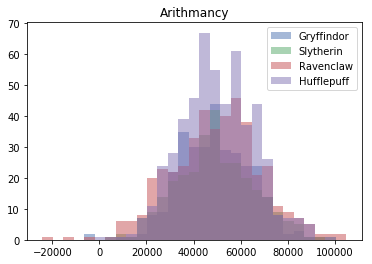

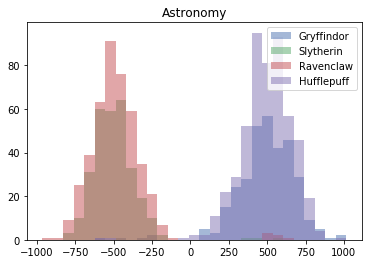

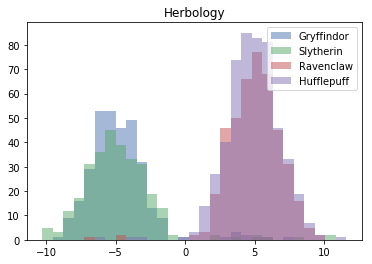

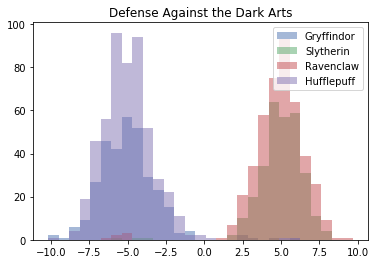

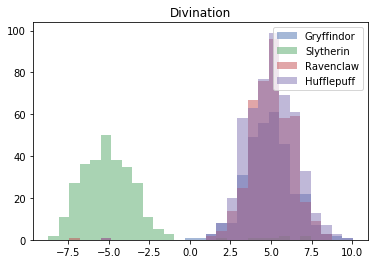

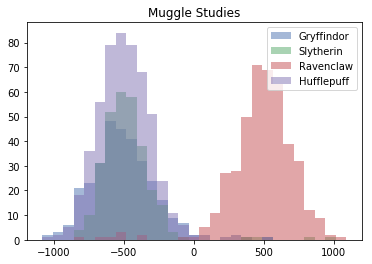

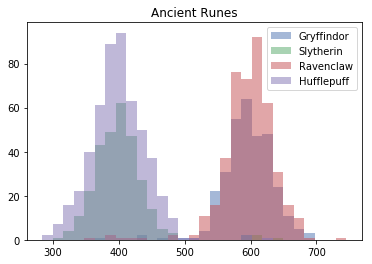

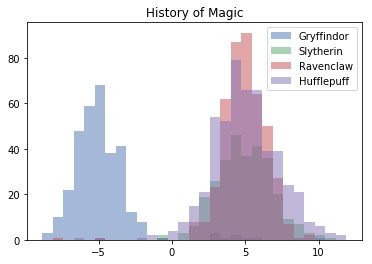

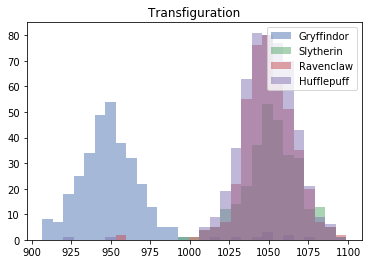

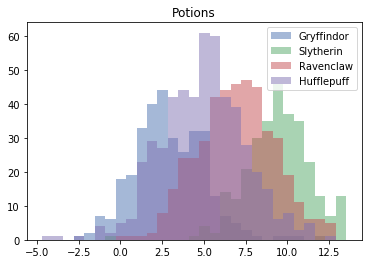

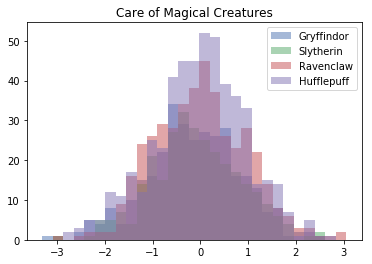

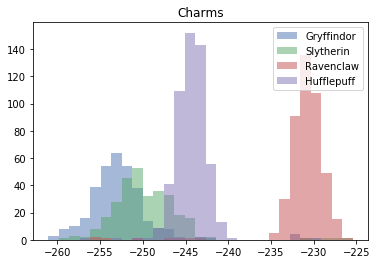

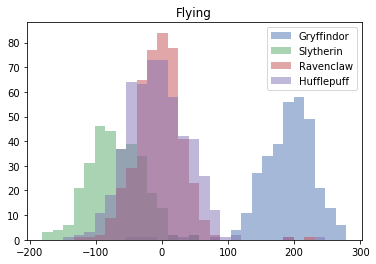

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-deep')

train = pd.read_csv("resources/dataset_train.csv")

def histogram_function(train):
    for i in range(6,train.shape[1]):
        grif = train.loc[train["Hogwarts House"] == "Gryffindor"]
        slyth = train.loc[train["Hogwarts House"] == "Slytherin"]
        rav = train.loc[train["Hogwarts House"] == "Ravenclaw"]
        huff = train.loc[train["Hogwarts House"] == "Hufflepuff"]

        grif = grif.iloc[:,[i]].dropna().values
        slyth = slyth.iloc[:,[i]].dropna().values
        rav = rav.iloc[:,[i]].dropna().values
        huff = huff.iloc[:,[i]].dropna().values

        bin = np.linspace(min(train.iloc[:,[i]].values), max(train.iloc[:,[i]].values), 30)

        plt.hist(grif,label=["Gryffindor"], bins=bin, alpha =0.5)
        plt.hist(slyth,label=["Slytherin"], bins=bin, alpha =0.5)
        plt.hist(rav,label=["Ravenclaw"], bins=bin, alpha =0.5)
        plt.hist(huff,label=["Hufflepuff"], bins=bin, alpha =0.5)
        plt.title(max(train.iloc[:,[i]]))
        plt.legend(loc='upper right')
        plt.show()
        
        
histogram_function(train)

# Scatterplot

ValueError: x and y must be the same size

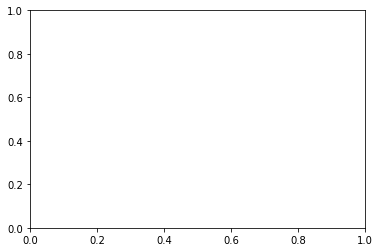

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-deep')

train = pd.read_csv("resources/dataset_train.csv")
i=6
xcol = 
ycol = 
plt.scatter()

grif1 = train.loc[train["Hogwarts House"] == "Gryffindor"]
slyth = train.loc[train["Hogwarts House"] == "Slytherin"]
rav = train.loc[train["Hogwarts House"] == "Ravenclaw"]
huff = train.loc[train["Hogwarts House"] == "Hufflepuff"]

grif = grif1.iloc[:,[i]].dropna().values
grif2 = grif1.iloc[:,[7]].dropna().values
slyth = slyth.iloc[:,[i]].dropna().values
rav = rav.iloc[:,[i]].dropna().values
huff = huff.iloc[:,[i]].dropna().values

bin = np.linspace(min(train.iloc[:,[i]].values), max(train.iloc[:,[i]].values), 30)

plt.scatter(grif,grif2,label=["Gryffindor"], bins=bin, alpha =0.5)
#plt.scatter(slyth,label=["Slytherin"], bins=bin, alpha =0.5)
#plt.scatter(rav,label=["Ravenclaw"], bins=bin, alpha =0.5)
#plt.scatter(huff,label=["Hufflepuff"], bins=bin, alpha =0.5)
plt.title(max(train.iloc[:,[i]]))
plt.legend(loc='upper right')
plt.show()
        